In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks", color_codes=True)

In [4]:
acoes = '../data/acoes/'
bova = pd.read_csv(acoes+"BOVA11.SA.csv")
bova.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-01,98.580002,100.250000,98.120003,98.430000,98.430000,6346650.0
1,2019-08-02,98.510002,99.410004,97.930000,98.779999,98.779999,4350500.0
2,2019-08-05,97.099998,97.360001,95.930000,96.470001,96.470001,9810050.0
3,2019-08-06,97.300003,98.449997,97.300003,98.440002,98.440002,4316730.0
4,2019-08-07,97.150002,99.050003,96.709999,99.050003,99.050003,5353270.0


In [5]:
vvar = pd.read_csv(acoes+"VVAR3.SA.csv")
mglu = pd.read_csv(acoes+"MGLU3.SA.csv")
btow = pd.read_csv(acoes+"BTOW3.SA.csv")

In [6]:
bova.shape

(250, 7)

In [75]:
len(bova.Date.unique())

250

In [76]:
vvar.shape

(250, 7)

In [77]:
len(vvar.Date.unique())

250

In [78]:
any(bova.Date.unique() == vvar.Date.unique())

True

In [79]:
mglu.shape

(250, 7)

In [80]:
btow.shape

(250, 7)

In [81]:
bova["nome"] = "bova11"
vvar["nome"] = "vvar3"
mglu["nome"] = "mglu3"
btow["nome"] = "btow3"

In [82]:
bova_vvar = pd.concat([bova,vvar])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


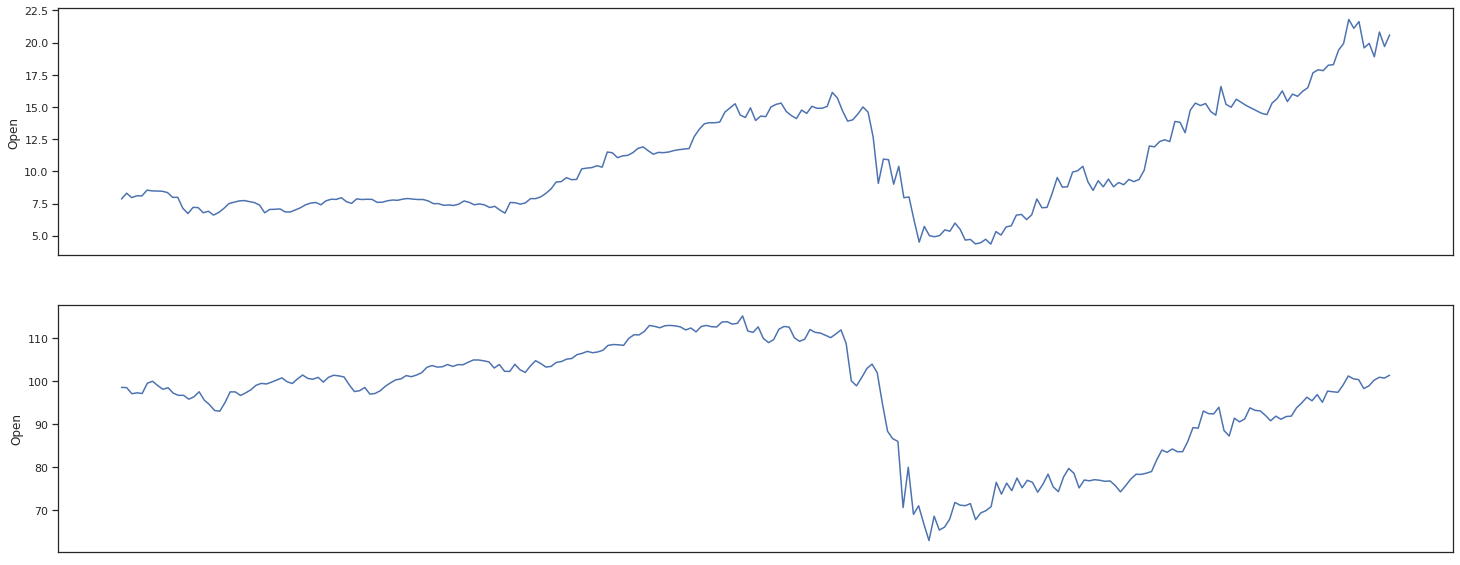

In [88]:
fig, ax =plt.subplots(2,1, figsize=(25, 10))
ax[0].set_xticks([])
ax[0].set_xlabel('01/08/2019 - 10/08/2020')
ax[1].set_xticks([])
ax[1].set_xlabel('01/08/2019 - 10/08/2020')
sns.lineplot(x="Date", y="Open", data=vvar, ax=ax[0])
sns.lineplot(x="Date", y="Open", data=bova, ax=ax[1])
fig.show()

In [96]:
bova_open = list(bova["Open"].values)
bova_atual = bova_open.copy()
bova_ontem = bova_open.copy()

In [97]:
bova_ontem.insert(0, 0)
bova_atual.append(0)

In [100]:
len(bova_atual)

251

In [105]:
bova_open = pd.Series(bova_atual) - pd.Series(bova_ontem)
bova_cresc = pd.concat([bova_open, bova["Date"]], axis=1).reset_index()
bova_cresc.head()

,index,0,Date
0,0,98.580002,2019-08-01
1,1,-0.070000,2019-08-02
2,2,-1.410004,2019-08-05
3,3,0.200005,2019-08-06
4,4,-0.150001,2019-08-07


In [ ]:
sns.lineplot(x="Date", y="Open", data=bova_open)